## Capital Market Line
_The efficient frontier dramatically changes shape when a risk-free asset is introduced_

## Maximum Sharpe Ratio Portfolio (MSR)
_Only one point on the frontier is interesting_
* The risk-free rate is drawn as a sloped line
* Where the line touches the Markowitz frontier is the most valuable valid portfolio
* The line is the same as the maximum sharpe ratio
> Maximum Sharpe ratio portfolios are very important because as we can see, all investors are actually optimally choosing to hold a portfolio on the capital market line. Meaning they are going to optimally choosing to hold a combination of that maximum Sharpe ratio portfolio and the risk-free asset. 

## Conclusion
* With a risk-free asset, the efficient frontier becomes a straight line 'capital market line'
* Investors should hold a mixture of the risk-free asset and the portfolio which maximises the reward-per-risk ration

In [16]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from my_modules import risk
from my_modules import data
from my_modules import portfolio

ind = data.get_ind30_vw_returns()
er = risk.annualise_rets(ind['1996':'2000'])
cov = ind['1996':'2000'].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from scipy.optimize import minimize
import numpy as np
import pandas as pd

In [8]:
def msrp(riskfree_rate, er, cov):
    """
    Riskfree rate + ER + Cov -> W
    """
    num_assets = er.shape[0]
    init_guess = np.repeat(1/num_assets, num_assets)
    
    # Constraint 1: Bounds, not leveraged or short
    bounds = ((0.0, 1.0),) * num_assets
    
    # Constraint 2: weights sum to 1
    weight_sum_1 = {
        'type': 'eq',
        'fun': lambda weights: np.sum(weights) - 1
    }
    
    def neg_sharpe_ratio(weights, riskfree_rate, er, cov):
        """
        Returns the negative of the sharpe ratio, given weights
        """
        ret = portfolio.returns(weights, er)
        vol = portfolio.volatility(weights, cov)
        return -(ret - riskfree_rate)/ vol
    
    # a bit backwards, we want max sharpe which is the smallest neg_sharpe
    results = minimize(neg_sharpe_ratio, init_guess,
                      args=(riskfree_rate, er, cov), method='SLSQP',
                      options={'disp': False},
                       constraints=(weight_sum_1),
                       bounds=bounds
                      )
    return results.x

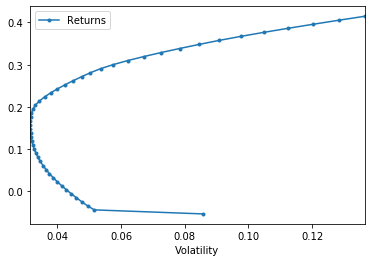

In [5]:
portfolio.plot_n_asset_frontier(20, er, cov)

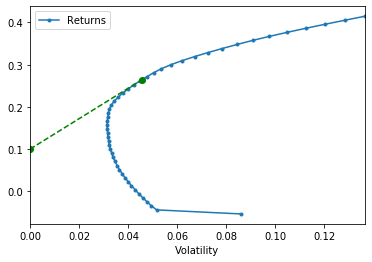

In [12]:
# We want to have limit
ax = portfolio.plot_n_asset_frontier(20, er, cov)
ax.set_xlim(left=0)

rf = 0.1
w_msr = msrp(rf, er, cov)
r_msr = portfolio.returns(w_msr, er)
vol_msr = portfolio.volatility(w_msr, cov)
# Add Capital Market Line
cml_x = [0, vol_msr] # We know two points of x
cml_y = [rf, r_msr]

ax.plot(cml_x, cml_y, color='green', marker='o', linestyle='dashed')

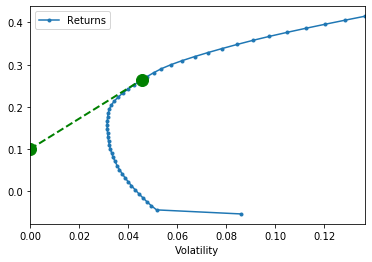

In [37]:
portfolio.plot_n_asset_frontier(20, er, cov, show_cml=True, riskfree_rate=0.1)